This is a simple demonstration of applying Autoencoders on the MNIST dataset for image denoising
___

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis = -1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis = -1)

In [5]:
noise_scalar = 0.5
x_train_noisy = x_train + noise_scalar * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_scalar * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [20]:
input_shape = (28, 28, 1)
latent_dim = 128

In [21]:
# Encoder
inputs = Input(shape = input_shape)
x = Conv2D(32, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same')(inputs)
x = Conv2D(64, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same')(x)
x = Flatten()(x)
latent_repr = Dense(latent_dim)(x)

In [22]:
# Decoder
x = Dense(7 * 7 * 64)(latent_repr)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(32, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same')(x)
decoded = Conv2DTranspose(1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same')(x)

In [23]:
# Autoencoder model
autoencoder = Model(inputs, decoded)

In [24]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.0002))

In [25]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [29]:
epochs = 15
batch_size = 256

In [30]:
history = autoencoder.fit(x_train_noisy, x_train, validation_data = (x_test_noisy, x_test), epochs = epochs, batch_size = batch_size, callbacks = [early_stopping])

Epoch 1/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0971 - val_loss: 0.0970
Epoch 2/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0966 - val_loss: 0.0967
Epoch 3/15
235/235 [==============================] - 15s 65ms/step - loss: 0.0962 - val_loss: 0.0962
Epoch 4/15
235/235 [==============================] - 15s 66ms/step - loss: 0.0958 - val_loss: 0.0960
Epoch 5/15
235/235 [==============================] - 16s 66ms/step - loss: 0.0955 - val_loss: 0.0957
Epoch 6/15
235/235 [==============================] - 16s 68ms/step - loss: 0.0951 - val_loss: 0.0955
Epoch 7/15
235/235 [==============================] - 16s 66ms/step - loss: 0.0948 - val_loss: 0.0954
Epoch 8/15
235/235 [==============================] - 15s 66ms/step - loss: 0.0945 - val_loss: 0.0951
Epoch 9/15
235/235 [==============================] - 16s 66ms/step - loss: 0.0942 - val_loss: 0.0949
Epoch 10/15
235/235 [==============================] - 16s 67ms/step - loss: 0.094

In [31]:
denoised_test_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 2s 5ms/step


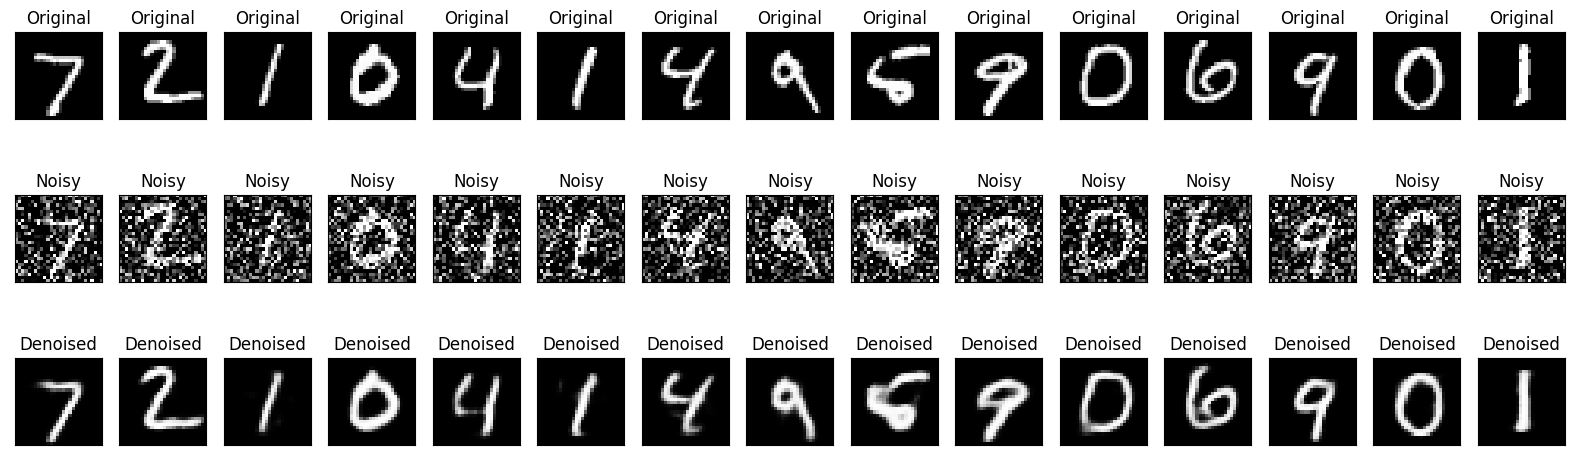

In [37]:
n = 15 # Number of images
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images row
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Noisy images row
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap = 'gray')
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Denoised images row
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(denoised_test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title("Denoised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()